# PIP T_VDJ

### Import packages

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import bbknn
#import scrublet as scr
import bbknn
from collections import Counter
import os
import bbknn
import scipy as scipy
import scirpy as ir

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()


-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
Levenshtein                 NA
PIL                         8.1.2
airr                        1.3.1
anndata                     0.7.5
annoy                       NA
anyio                       NA
attr                        20.3.0
babel                       2.9.0
backcall                    0.2.0
bbknn                       NA
brotli                      NA
cairo                       1.20.0
certifi                     2020.12.05
cffi                        1.14.5
chardet                     4.0.0
cloudpickle                 1.6.0
colorama                    0.4.4
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.11.0
dask                        2021.03.1
dateutil                    2.8.1
decorator                   4.4.2
fsspec                      0.8.7
get_version                 2.1
google                      NA
h5py                        3.1.0
idna                     

### Open metadata

In [4]:
meta_T = pd.read_csv('/home/jovyan/LungQC/adult_5loc_VDJ/Lung_samples_TCR.csv')

In [13]:
meta_T

,sample,Location,Loc_short,Loc_master,Donor_loc,Loc_master2,Donor_locmaster,Donor,ID,Version,Gender,Study,ID_BCR,ID_TCR
0,5841STDY7991475,Lower_left_lobe,LowLeftPar,Par,A37_LowLeftPar,Par,A37_Par,A37,A37-LNG-1-SC-45P-1,10x5prime,F,5_loc,5841STDY7998693,5841STDY7998709
1,5841STDY7991476,2nd/3rd_gen_airway,2_3_AW,AW,A37_2_3_AW,Mid,A37_Mid,A37,A37-LNG-3-SC-45P-1,10x5prime,F,5_loc,5841STDY7998694,5841STDY7998710
2,5841STDY7991477,4th_gen_airway,4_AW,4_AW,A37_4_AW,Mid,A37_Mid,A37,A37-LNG-4-SC-45P-1,10x5prime,F,5_loc,5841STDY7998695,5841STDY7998711
3,5841STDY7991478,4th_gen_airway,4_AW,4_AW,A37_4_AW,Mid,A37_Mid,A37,A37-LNG-4-SC-45P-2,10x5prime,F,5_loc,5841STDY7998696,5841STDY7998712
4,5841STDY7991479,Top_left_lobe,TopLeftPar,Par,A37_TopLeftPar,Par,A37_Par,A37,A37-LNG-5-SC-45P-1,10x5prime,F,5_loc,5841STDY7998697,5841STDY7998713
5,5841STDY7991482,Lower_left_lobe,LowLeftPar,Par,A37_LowLeftPar,Par,A37_Par,A37,A37-LNG-1-SC-45N-1,10x5prime,F,5_loc,5841STDY7998701,5841STDY7998717
6,5841STDY7991483,1st_gen_airway,1_AW,AW,A37_1_AW,AW,A37_AW,A37,A37-LNG-2-SC-45N-1,10x5prime,F,5_loc,5841STDY7998702,5841STDY7998718
7,5841STDY7991484,2nd/3rd_gen_airway,2_3_AW,AW,A37_2_3_AW,Mid,A37_Mid,A37,A37-LNG-3-SC-45N-1,10x5prime,F,5_loc,5841STDY7998703,5841STDY7998719
8,5841STDY7991485,4th_gen_airway,4_AW,4_AW,A37_4_AW,Mid,A37_Mid,A37,A37-LNG-4-SC-45N-1,10x5prime,F,5_loc,5841STDY7998704,5841STDY7998720
9,5841STDY7991486,4th_gen_airway,4_AW,4_AW,A37_4_AW,Mid,A37_Mid,A37,A37-LNG-4-SC-45N-2,10x5prime,F,5_loc,5841STDY7998705,5841STDY7998721


## Open contig annotations file and create the vdj dictionary

In [7]:
#Replace Sanger_Sample_ID with ID_TCR
#Replace 'Identity' with 'Donor_loc'
mapping = dict(meta_T[['ID_TCR', 'Donor_loc']].values)

In [8]:
vdj = {}

for i in meta_T['ID_TCR']:
    Donor = meta_T['Donor']
    Loc_short = meta_T['Loc_short']
    
    try:
        fileloc = "/home/jovyan/LungQC/adult_5loc_VDJ/%s/filtered_contig_annotations.csv"%(i)
        vdj[i] = pd.read_csv(fileloc)
        vdj[i]['CloneID'] = [i+'-'+x for x in vdj[i]['raw_clonotype_id']]
        vdj[i]['CellID'] = [i+'-'+x for x in vdj[i]['barcode']]
        vdj[i]['ID_TCR'] = i
        print(i, )
    except:
        pass

5841STDY7998709
5841STDY7998710
5841STDY7998711
5841STDY7998712
5841STDY7998713
5841STDY7998717
5841STDY7998718
5841STDY7998719
5841STDY7998720
5841STDY7998721
5841STDY7998722
WSSS_A_LNG8620155
WSSS_A_LNG8620156
WSSS_A_LNG8620157
WSSS_A_LNG8620158
WSSS_A_LNG8620159
WSSS8090091
WSSS8090092
WSSS8090093
WSSS8090094
WSSS8090095
WSSS8090096
WSSS8090097
WSSS8090098
WSSS8090099
WSSS8090100
WSSS8123942
WSSS8123943
WSSS8123944
WSSS8123945
WSSS8123946
WSSS8123947
WSSS8123948
WSSS8123949
WSSS8123950
WSSS8123951


In [7]:
#vdj

{}

In [9]:
vdj['WSSS8123942'].head(2)

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id,CloneID,CellID,ID_TCR
0,AAACCTGCAGACAAGC-1,True,AAACCTGCAGACAAGC-1_contig_1,True,475,TRB,TRBV4-3,None,TRBJ2-1,TRBC2,...,True,CASSRGASNEQFF,TGCGCCAGCAGCCGGGGGGCGAGCAATGAGCAGTTCTTC,35810,19,clonotype35,clonotype35_consensus_1,WSSS8123942-clonotype35,WSSS8123942-AAACCTGCAGACAAGC-1,WSSS8123942
1,AAACCTGCAGACAAGC-1,True,AAACCTGCAGACAAGC-1_contig_2,True,541,TRA,TRAV12-2,None,TRAJ9,TRAC,...,True,CAVNPGGFKTIF,TGTGCCGTGAACCCCGGAGGCTTCAAAACTATCTTT,954,2,clonotype35,clonotype35_consensus_2,WSSS8123942-clonotype35,WSSS8123942-AAACCTGCAGACAAGC-1,WSSS8123942


#### Adding a cutoff of 2 umi counts to consider any contig

In [10]:
vdj_filtered = {}
for i in vdj:
    umi_threshold = vdj[i]['umis'] > 1
    vdj_filtered[i] = vdj[i][umi_threshold]

In [11]:
vdj_filtered['WSSS8123942'].nunique()

barcode             1033
is_cell                1
contig_id           2021
high_confidence        1
length               345
chain                  3
v_gene                92
d_gene                 1
j_gene                66
c_gene                 4
full_length            2
productive             2
cdr3                1588
cdr3_nt             1598
reads               1787
umis                  28
raw_clonotype_id     960
raw_consensus_id    1565
CloneID              960
CellID              1033
ID_TCR                 1
dtype: int64

In [ ]:
for n in vdj_filtered:
    vdj_filtered[n]['Donor_loc'] = vdj_filtered[n].ID_TCR.map(mapping)

In [ ]:
for n in vdj_filtered:
    vdj_filtered[n]['Donor'] = [x.split('_')[0] for x in vdj_filtered[n]['Donor_loc']]
    vdj_filtered[n]['Loc_short'] = [x.split('_')[1] for x in vdj_filtered[n]['Donor_loc']]

In [15]:
vdj_filtered['WSSS8123942']

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,reads,umis,raw_clonotype_id,raw_consensus_id,CloneID,CellID,ID_TCR,Donor_loc,Donor,Loc_short
0,AAACCTGCAGACAAGC-1,True,AAACCTGCAGACAAGC-1_contig_1,True,475,TRB,TRBV4-3,None,TRBJ2-1,TRBC2,...,35810,19,clonotype35,clonotype35_consensus_1,WSSS8123942-clonotype35,WSSS8123942-AAACCTGCAGACAAGC-1,WSSS8123942,A44_LowLeftPar,A44,LowLeftPar
1,AAACCTGCAGACAAGC-1,True,AAACCTGCAGACAAGC-1_contig_2,True,541,TRA,TRAV12-2,None,TRAJ9,TRAC,...,954,2,clonotype35,clonotype35_consensus_2,WSSS8123942-clonotype35,WSSS8123942-AAACCTGCAGACAAGC-1,WSSS8123942,A44_LowLeftPar,A44,LowLeftPar
2,AAACCTGTCGAACTGT-1,True,AAACCTGTCGAACTGT-1_contig_1,True,496,TRB,TRBV3-1,None,TRBJ2-2,TRBC2,...,7946,6,clonotype36,clonotype36_consensus_2,WSSS8123942-clonotype36,WSSS8123942-AAACCTGTCGAACTGT-1,WSSS8123942,A44_LowLeftPar,A44,LowLeftPar
3,AAACCTGTCGAACTGT-1,True,AAACCTGTCGAACTGT-1_contig_2,True,503,TRA,TRAV23/DV6,None,TRAJ34,TRAC,...,1750,2,clonotype36,clonotype36_consensus_1,WSSS8123942-clonotype36,WSSS8123942-AAACCTGTCGAACTGT-1,WSSS8123942,A44_LowLeftPar,A44,LowLeftPar
4,AAACCTGTCGAACTGT-1,True,AAACCTGTCGAACTGT-1_contig_3,True,432,TRB,None,None,TRBJ2-7,TRBC2,...,6022,2,clonotype36,None,WSSS8123942-clonotype36,WSSS8123942-AAACCTGTCGAACTGT-1,WSSS8123942,A44_LowLeftPar,A44,LowLeftPar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,TTTGGTTAGTGAATTG-1,True,TTTGGTTAGTGAATTG-1_contig_4,True,461,TRB,TRBV28,None,TRBJ2-4,TRBC2,...,1100,3,clonotype959,None,WSSS8123942-clonotype959,WSSS8123942-TTTGGTTAGTGAATTG-1,WSSS8123942,A44_LowLeftPar,A44,LowLeftPar
2317,TTTGGTTCAGTTTACG-1,True,TTTGGTTCAGTTTACG-1_contig_1,True,481,TRB,TRBV4-2,None,TRBJ2-7,TRBC2,...,16824,11,clonotype960,clonotype960_consensus_3,WSSS8123942-clonotype960,WSSS8123942-TTTGGTTCAGTTTACG-1,WSSS8123942,A44_LowLeftPar,A44,LowLeftPar
2318,TTTGGTTCAGTTTACG-1,True,TTTGGTTCAGTTTACG-1_contig_2,True,520,TRA,TRAV14/DV4,None,TRAJ42,TRAC,...,8856,3,clonotype960,clonotype960_consensus_1,WSSS8123942-clonotype960,WSSS8123942-TTTGGTTCAGTTTACG-1,WSSS8123942,A44_LowLeftPar,A44,LowLeftPar
2319,TTTGGTTCAGTTTACG-1,True,TTTGGTTCAGTTTACG-1_contig_3,True,477,TRA,TRAV38-2/DV8,None,TRAJ43,TRAC,...,6638,5,clonotype960,clonotype960_consensus_2,WSSS8123942-clonotype960,WSSS8123942-TTTGGTTCAGTTTACG-1,WSSS8123942,A44_LowLeftPar,A44,LowLeftPar


In [16]:
vdj_df = pd.concat([df for df_key,df in vdj_filtered.items()])

In [17]:
vdj_df.index = vdj_df['CellID']

In [26]:
#vdj_df.to_csv('/home/jovyan/LungQC/adult_5loc_VDJ/TCR.csv')

In [18]:
vdj_df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,reads,umis,raw_clonotype_id,raw_consensus_id,CloneID,CellID,ID_TCR,Donor_loc,Donor,Loc_short
CellID,,,,,,,,,,,,,,,,,,,,,
5841STDY7998709-AAAGCAAGTGGCCCTA-1,AAAGCAAGTGGCCCTA-1,True,AAAGCAAGTGGCCCTA-1_contig_1,True,581,TRA,TRAV5,None,TRAJ44,TRAC,...,3522,8,clonotype44,clonotype44_consensus_2,5841STDY7998709-clonotype44,5841STDY7998709-AAAGCAAGTGGCCCTA-1,5841STDY7998709,A37_LowLeftPar,A37,LowLeftPar
5841STDY7998709-AAAGCAAGTGGCCCTA-1,AAAGCAAGTGGCCCTA-1,True,AAAGCAAGTGGCCCTA-1_contig_2,True,481,TRB,TRBV4-2,None,TRBJ2-1,TRBC2,...,2440,8,clonotype44,clonotype44_consensus_1,5841STDY7998709-clonotype44,5841STDY7998709-AAAGCAAGTGGCCCTA-1,5841STDY7998709,A37_LowLeftPar,A37,LowLeftPar
5841STDY7998709-AAAGCAAGTGGCCCTA-1,AAAGCAAGTGGCCCTA-1,True,AAAGCAAGTGGCCCTA-1_contig_3,True,505,TRB,TRBV7-2,None,TRBJ2-7,TRBC2,...,6400,13,clonotype44,clonotype44_consensus_3,5841STDY7998709-clonotype44,5841STDY7998709-AAAGCAAGTGGCCCTA-1,5841STDY7998709,A37_LowLeftPar,A37,LowLeftPar
5841STDY7998709-AAAGCAAGTGGCCCTA-1,AAAGCAAGTGGCCCTA-1,True,AAAGCAAGTGGCCCTA-1_contig_4,True,505,TRA,TRAV1-2,None,TRAJ33,TRAC,...,2066,4,clonotype44,clonotype44_consensus_4,5841STDY7998709-clonotype44,5841STDY7998709-AAAGCAAGTGGCCCTA-1,5841STDY7998709,A37_LowLeftPar,A37,LowLeftPar
5841STDY7998709-AAAGCAAGTGGCCCTA-1,AAAGCAAGTGGCCCTA-1,True,AAAGCAAGTGGCCCTA-1_contig_5,True,548,TRA,TRAV12-2,None,TRAJ29,TRAC,...,884,2,clonotype44,None,5841STDY7998709-clonotype44,5841STDY7998709-AAAGCAAGTGGCCCTA-1,5841STDY7998709,A37_LowLeftPar,A37,LowLeftPar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSSS8123951-TTTATGCGTAACGACG-1,TTTATGCGTAACGACG-1,True,TTTATGCGTAACGACG-1_contig_1,True,567,TRA,TRAV8-4,None,TRAJ30,TRAC,...,11448,7,clonotype52,clonotype52_consensus_2,WSSS8123951-clonotype52,WSSS8123951-TTTATGCGTAACGACG-1,WSSS8123951,A44_TopLeftPar,A44,TopLeftPar
WSSS8123951-TTTATGCGTAACGACG-1,TTTATGCGTAACGACG-1,True,TTTATGCGTAACGACG-1_contig_2,True,469,TRB,TRBV2,None,TRBJ1-5,TRBC1,...,8682,3,clonotype52,clonotype52_consensus_1,WSSS8123951-clonotype52,WSSS8123951-TTTATGCGTAACGACG-1,WSSS8123951,A44_TopLeftPar,A44,TopLeftPar
WSSS8123951-TTTGGTTAGCCCAATT-1,TTTGGTTAGCCCAATT-1,True,TTTGGTTAGCCCAATT-1_contig_1,True,666,TRB,TRBV19,None,TRBJ2-1,TRBC2,...,3978,2,clonotype361,clonotype361_consensus_1,WSSS8123951-clonotype361,WSSS8123951-TTTGGTTAGCCCAATT-1,WSSS8123951,A44_TopLeftPar,A44,TopLeftPar


## Plotting the number of cell barcodes with a detected productive TCR

In [19]:
vdj_filtered['WSSS8123942']['Donor_loc'][0]

'A44_LowLeftPar'

In [20]:
vdj['WSSS8123942']

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id,CloneID,CellID,ID_TCR
0,AAACCTGCAGACAAGC-1,True,AAACCTGCAGACAAGC-1_contig_1,True,475,TRB,TRBV4-3,None,TRBJ2-1,TRBC2,...,True,CASSRGASNEQFF,TGCGCCAGCAGCCGGGGGGCGAGCAATGAGCAGTTCTTC,35810,19,clonotype35,clonotype35_consensus_1,WSSS8123942-clonotype35,WSSS8123942-AAACCTGCAGACAAGC-1,WSSS8123942
1,AAACCTGCAGACAAGC-1,True,AAACCTGCAGACAAGC-1_contig_2,True,541,TRA,TRAV12-2,None,TRAJ9,TRAC,...,True,CAVNPGGFKTIF,TGTGCCGTGAACCCCGGAGGCTTCAAAACTATCTTT,954,2,clonotype35,clonotype35_consensus_2,WSSS8123942-clonotype35,WSSS8123942-AAACCTGCAGACAAGC-1,WSSS8123942
2,AAACCTGTCGAACTGT-1,True,AAACCTGTCGAACTGT-1_contig_1,True,496,TRB,TRBV3-1,None,TRBJ2-2,TRBC2,...,True,CASSQGGLGGELFF,TGTGCCAGCAGCCAAGGGGGGCTCGGCGGGGAGCTGTTTTTT,7946,6,clonotype36,clonotype36_consensus_2,WSSS8123942-clonotype36,WSSS8123942-AAACCTGTCGAACTGT-1,WSSS8123942
3,AAACCTGTCGAACTGT-1,True,AAACCTGTCGAACTGT-1_contig_2,True,503,TRA,TRAV23/DV6,None,TRAJ34,TRAC,...,True,CAASNVDTDKLIF,TGTGCAGCAAGCAATGTAGACACCGACAAGCTCATCTTT,1750,2,clonotype36,clonotype36_consensus_1,WSSS8123942-clonotype36,WSSS8123942-AAACCTGTCGAACTGT-1,WSSS8123942
4,AAACCTGTCGAACTGT-1,True,AAACCTGTCGAACTGT-1_contig_3,True,432,TRB,None,None,TRBJ2-7,TRBC2,...,False,None,None,6022,2,clonotype36,None,WSSS8123942-clonotype36,WSSS8123942-AAACCTGTCGAACTGT-1,WSSS8123942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,TTTGGTTAGTGAATTG-1,True,TTTGGTTAGTGAATTG-1_contig_4,True,461,TRB,TRBV28,None,TRBJ2-4,TRBC2,...,False,CQQSPGTGNIQYF,TGCCAGCAGTCCCCTGGGACAGGGAACATTCAGTACTTC,1100,3,clonotype959,None,WSSS8123942-clonotype959,WSSS8123942-TTTGGTTAGTGAATTG-1,WSSS8123942
2317,TTTGGTTCAGTTTACG-1,True,TTTGGTTCAGTTTACG-1_contig_1,True,481,TRB,TRBV4-2,None,TRBJ2-7,TRBC2,...,True,CASSPGLAGGREQYF,TGTGCCAGCAGCCCCGGACTAGCGGGGGGCCGGGAGCAGTACTTC,16824,11,clonotype960,clonotype960_consensus_3,WSSS8123942-clonotype960,WSSS8123942-TTTGGTTCAGTTTACG-1,WSSS8123942
2318,TTTGGTTCAGTTTACG-1,True,TTTGGTTCAGTTTACG-1_contig_2,True,520,TRA,TRAV14/DV4,None,TRAJ42,TRAC,...,True,CAMCRGSQGNLIF,TGTGCAATGTGTCGAGGAAGCCAAGGAAATCTCATCTTT,8856,3,clonotype960,clonotype960_consensus_1,WSSS8123942-clonotype960,WSSS8123942-TTTGGTTCAGTTTACG-1,WSSS8123942
2319,TTTGGTTCAGTTTACG-1,True,TTTGGTTCAGTTTACG-1_contig_3,True,477,TRA,TRAV38-2/DV8,None,TRAJ43,TRAC,...,True,CAYRSGRNNDMRF,TGTGCTTATAGGAGCGGACGGAACAATGACATGCGCTTT,6638,5,clonotype960,clonotype960_consensus_2,WSSS8123942-clonotype960,WSSS8123942-TTTGGTTCAGTTTACG-1,WSSS8123942


In [21]:
samples = list(meta_T['ID_TCR'])

In [22]:
samples

['5841STDY7998709',
 '5841STDY7998710',
 '5841STDY7998711',
 '5841STDY7998712',
 '5841STDY7998713',
 '5841STDY7998717',
 '5841STDY7998718',
 '5841STDY7998719',
 '5841STDY7998720',
 '5841STDY7998721',
 '5841STDY7998722',
 'WSSS_A_LNG8620155',
 'WSSS_A_LNG8620156',
 'WSSS_A_LNG8620157',
 'WSSS_A_LNG8620158',
 'WSSS_A_LNG8620159',
 'WSSS8090091',
 'WSSS8090092',
 'WSSS8090093',
 'WSSS8090094',
 'WSSS8090095',
 'WSSS8090096',
 'WSSS8090097',
 'WSSS8090098',
 'WSSS8090099',
 'WSSS8090100',
 'WSSS8123942',
 'WSSS8123943',
 'WSSS8123944',
 'WSSS8123945',
 'WSSS8123946',
 'WSSS8123947',
 'WSSS8123948',
 'WSSS8123949',
 'WSSS8123950',
 'WSSS8123951']

In [23]:
count = []
sample = []
for n in samples:
    productive = vdj_filtered[n]['productive'] == True
    prod = vdj_filtered[n][productive]
    count.append(prod['CellID'].nunique())
    sample.append(n)

In [24]:
ID = list(meta_T['Donor_loc'])

In [25]:
d = {'Cell count':count, 'Samples':sample, 'ID':ID}

In [26]:
df = pd.DataFrame(d)

In [27]:
df

,Cell count,Samples,ID
0,521,5841STDY7998709,A37_LowLeftPar
1,257,5841STDY7998710,A37_2_3_AW
2,324,5841STDY7998711,A37_4_AW
3,622,5841STDY7998712,A37_4_AW
4,900,5841STDY7998713,A37_TopLeftPar
5,139,5841STDY7998717,A37_LowLeftPar
6,44,5841STDY7998718,A37_1_AW
7,151,5841STDY7998719,A37_2_3_AW
8,140,5841STDY7998720,A37_4_AW
9,195,5841STDY7998721,A37_4_AW


In [67]:
#df.to_csv('/home/jovyan/LungQC/adult_5loc_VDJ/TCR_count_final')

In [28]:
np.sum(df['Cell count'])

21929

In [29]:
clones = {}
for i in meta_T['ID_TCR']:
    try:
        fileloc = "/home/jovyan/LungQC/adult_5loc_VDJ/%s/clonotypes.csv"%(i)
        clones[i] = pd.read_csv(fileloc)
        clones[i]['CloneID'] = [i+'-'+x for x in clones[i]['clonotype_id']]
        clones[i]['ID_TCR'] = i
    except:pass

In [30]:
clone_df = pd.concat([df for df_key,df in clones.items()])

In [31]:
clone_df

,clonotype_id,frequency,proportion,cdr3s_aa,cdr3s_nt,CloneID,ID_TCR
0,clonotype1,27,0.051625,TRA:CAVSYSGGGADGLTF;TRB:CASSSWGQAEQFF,TRA:TGTGCCGTGTCTTATTCAGGAGGAGGTGCTGACGGACTCACC...,5841STDY7998709-clonotype1,5841STDY7998709
1,clonotype2,17,0.032505,TRB:CASSSWGQAEQFF,TRB:TGCGCCAGCAGCTCATGGGGGCAGGCTGAGCAGTTCTTC,5841STDY7998709-clonotype2,5841STDY7998709
2,clonotype3,12,0.022945,TRA:CALRYGGSQGNLIF;TRB:CASSPDGLAGLYEQYF,TRA:TGTGCTTTGAGGTATGGAGGAAGCCAAGGAAATCTCATCTTT...,5841STDY7998709-clonotype3,5841STDY7998709
3,clonotype4,11,0.021033,TRA:CILMETSYDKVIF;TRB:CASSFSGSGELFF,TRA:TGCATCCTGATGGAAACCTCCTACGACAAGGTGATATTT;TR...,5841STDY7998709-clonotype4,5841STDY7998709
4,clonotype5,9,0.017208,TRA:CALRSGGGADGLTF;TRB:CASSPVLAGTDAETQYF,TRA:TGTGCTCTGCGTTCAGGAGGAGGTGCTGACGGACTCACCTTT...,5841STDY7998709-clonotype5,5841STDY7998709
...,...,...,...,...,...,...,...
356,clonotype261,1,0.002033,TRA:CAENQFYGGATNKLIF,TRA:TGTGCAGAGAACCAATTTTATGGTGGTGCTACAAACAAGCTC...,WSSS8123951-clonotype261,WSSS8123951
357,clonotype260,1,0.002033,TRA:CALSGAGNNRKLIW;TRB:CASSSLVGGFNTEAFF,TRA:TGTGCTCTGAGTGGGGCTGGCAACAACCGTAAGCTGATTTGG...,WSSS8123951-clonotype260,WSSS8123951
358,clonotype269,1,0.002033,TRA:CAGSSNTGKLIF;TRB:CASSPGGLDYEQYF,TRA:TGTGCCGGCTCTAGCAACACAGGCAAACTAATCTTT;TRB:T...,WSSS8123951-clonotype269,WSSS8123951
359,clonotype268,1,0.002033,TRB:CASSPPTGGLQETQYF,TRB:TGTGCCAGCAGCCCACCGACCGGGGGGCTCCAAGAGACCCAG...,WSSS8123951-clonotype268,WSSS8123951


In [77]:
#clone_df.to_csv('/home/jovyan/LungQC/adult_5loc_VDJ/clone_df.csv')

## Assign shared_clonotype_id by donor

#### First filter out the clonotypes with only one cell detected

In [32]:
clone1 = clone_df['frequency'] > 1

In [33]:
cln1 = clone_df[clone1]

In [34]:
cln1

,clonotype_id,frequency,proportion,cdr3s_aa,cdr3s_nt,CloneID,ID_TCR
0,clonotype1,27,0.051625,TRA:CAVSYSGGGADGLTF;TRB:CASSSWGQAEQFF,TRA:TGTGCCGTGTCTTATTCAGGAGGAGGTGCTGACGGACTCACC...,5841STDY7998709-clonotype1,5841STDY7998709
1,clonotype2,17,0.032505,TRB:CASSSWGQAEQFF,TRB:TGCGCCAGCAGCTCATGGGGGCAGGCTGAGCAGTTCTTC,5841STDY7998709-clonotype2,5841STDY7998709
2,clonotype3,12,0.022945,TRA:CALRYGGSQGNLIF;TRB:CASSPDGLAGLYEQYF,TRA:TGTGCTTTGAGGTATGGAGGAAGCCAAGGAAATCTCATCTTT...,5841STDY7998709-clonotype3,5841STDY7998709
3,clonotype4,11,0.021033,TRA:CILMETSYDKVIF;TRB:CASSFSGSGELFF,TRA:TGCATCCTGATGGAAACCTCCTACGACAAGGTGATATTT;TR...,5841STDY7998709-clonotype4,5841STDY7998709
4,clonotype5,9,0.017208,TRA:CALRSGGGADGLTF;TRB:CASSPVLAGTDAETQYF,TRA:TGTGCTCTGCGTTCAGGAGGAGGTGCTGACGGACTCACCTTT...,5841STDY7998709-clonotype5,5841STDY7998709
...,...,...,...,...,...,...,...
47,clonotype28,2,0.004065,TRA:CAEASGGYQKVTF;TRB:CASSLGQGASYEQYF,TRA:TGTGCAGAGGCTTCTGGGGGTTACCAGAAAGTTACCTTT;TR...,WSSS8123951-clonotype28,WSSS8123951
48,clonotype29,2,0.004065,TRB:CASAGGGNSPLHF,TRB:TGTGCCAGCGCAGGAGGGGGGAATTCACCCCTCCACTTT,WSSS8123951-clonotype29,WSSS8123951
49,clonotype51,2,0.004065,TRA:CALRGAGNMLTF;TRB:CASSLAFSWNANTGELFF,TRA:TGTGCCCTGCGAGGTGCAGGCAACATGCTCACCTTT;TRB:T...,WSSS8123951-clonotype51,WSSS8123951
50,clonotype50,2,0.004065,TRB:CASSTRTGGPSNYGYTF,TRB:TGTGCCAGCTCAACCCGGACAGGGGGCCCCTCTAACTATGGC...,WSSS8123951-clonotype50,WSSS8123951


#### Create a list with all unique clones across samples

In [35]:
all_clones = list(cln1['cdr3s_nt'].unique())

In [36]:
len(all_clones)

978

In [37]:
len(cln1) 

1401

#### also analyse the clonotypes with only one cell detected

In [38]:
all_clones_wo_filter = list(clone_df['cdr3s_nt'].unique())

In [39]:
len(all_clones_wo_filter)

16476

In [40]:
clone_df_CloneID = clone_df['CloneID'].unique()

## Clonotype calling across all individuals (without filtering out the ones with only one cell representing them (for n in all_clones_wo_filter)

In [43]:
IDs = list(meta_T['Donor_loc'])

In [45]:
from collections import defaultdict
cln_dict = defaultdict(list)

for n in all_clones_wo_filter:
    for s in samples:
        cond = clones[s]['cdr3s_nt'] == n
        clon_count = clones[s][cond]
        cln_dict[n].append(clon_count['CloneID'].count())

In [46]:
clone_detection = pd.DataFrame(cln_dict).T
clone_detection.columns = IDs

In [91]:
#clone_detection.to_csv('/home/jovyan/LungQC/adult_5loc_VDJ/clone_detection_final_fig_wof.csv')

In [47]:
infile = pd.read_csv('/home/jovyan/LungQC/adult_5loc_VDJ/clone_detection_final_fig_wof.csv', index_col=0)

output_all = pd.DataFrame(0, index=infile.columns, columns=infile.columns)


for c in infile.index:
    for s in infile.columns:
        for i in infile.columns:     
            if infile.loc[c,s] == 1 & infile.loc[c,i] == 1:
                output_all.loc[s,i] += 1

print(output_all)

                  A37_LowLeftPar  A37_2_3_AW  A37_4_AW  A37_4_AW.1  \
A37_LowLeftPar               357          27        26          57   
A37_2_3_AW                    27         229        25          35   
A37_4_AW                      26          25       270          37   
A37_4_AW.1                    57          35        37         389   
A37_TopLeftPar                63          38        40          94   
A37_LowLeftPar.1              27          20        18          33   
A37_1_AW                       7          12        13          12   
A37_2_3_AW.1                  10          13        13          16   
A37_4_AW.2                    13          15        17          23   
A37_4_AW.3                    32          18        25          48   
A37_TopLeftPar.1              55          35        46          84   
A47_1_AW                       0           0         0           0   
A47_2_3_AW                     0           0         0           0   
A47_2_3_AW.1        

### Plot the sharing in absolute clonotype numbers

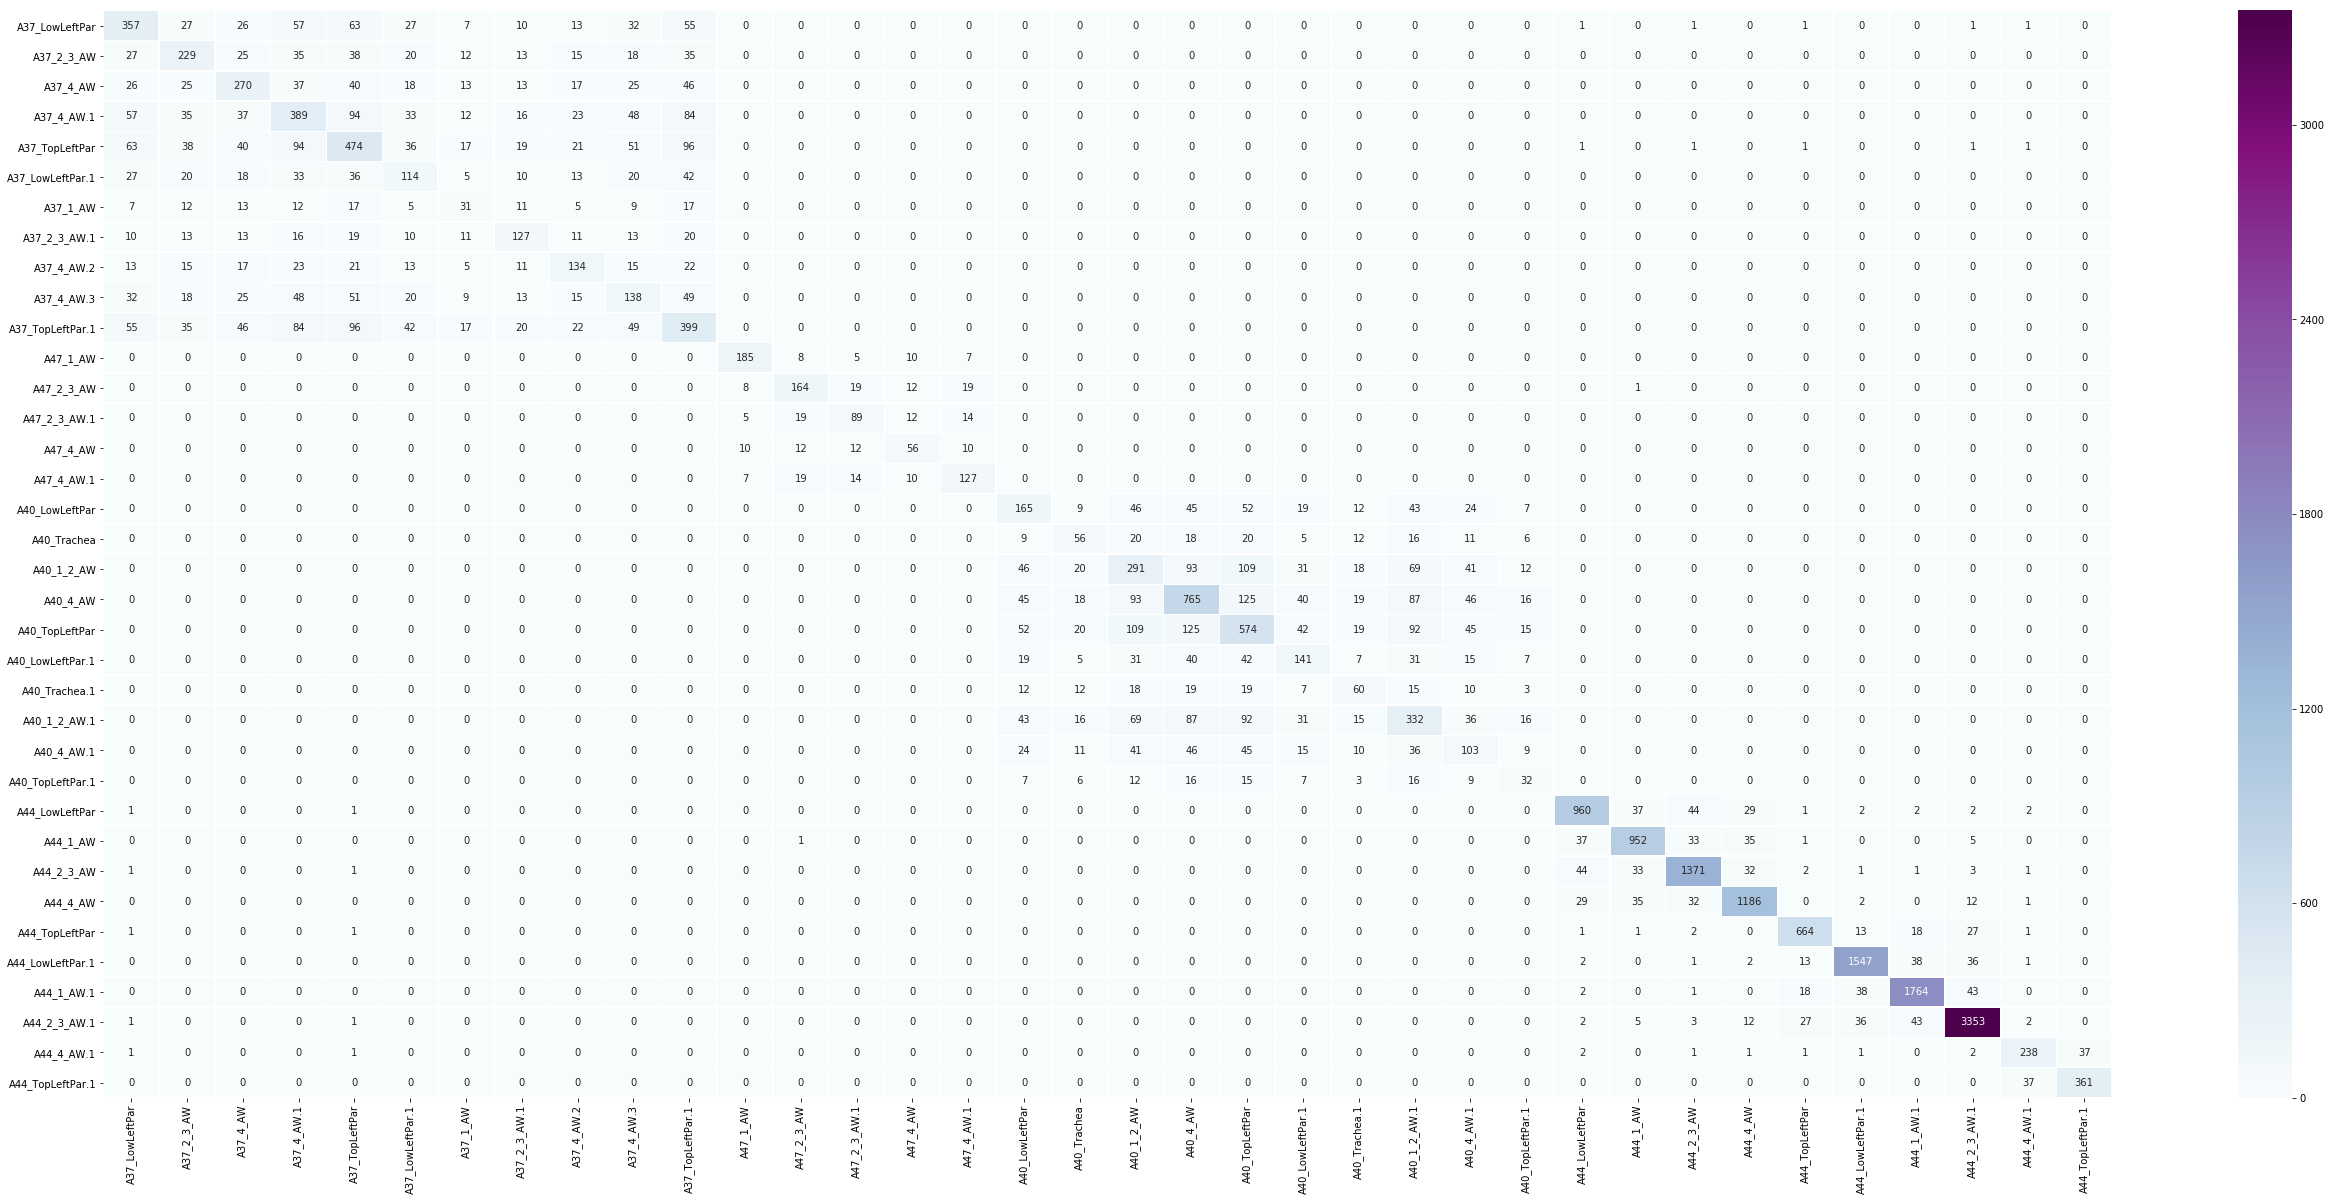

In [93]:
plt.figure(figsize = (45,20))

sns.heatmap(output_all, annot=True, fmt="d", linewidths=.5, cmap="BuPu")

In [94]:
#output_all.to_csv('/home/jovyan/LungQC/adult_5loc_VDJ/clonotype_sharing_all_final_fig_wof.csv')

### Calculate the proportion of clonotypes shared

In [48]:
infile = pd.read_csv('/home/jovyan/LungQC/adult_5loc_VDJ/clonotype_sharing_all_final_fig_wof.csv', index_col=0)

prop_shared_all = pd.DataFrame(0, index=infile.columns, columns=infile.columns)


for c in infile.index:
    for s in infile.columns:    
            if infile.loc[c,c] == 0:
                prop_shared_all.loc[c,s] = 0
            else:
                prop_shared_all.loc[c,s] = round(infile.loc[c,s]/infile.loc[c,c], 2)

print(prop_shared_all)

                  A37_LowLeftPar  A37_2_3_AW  A37_4_AW  A37_4_AW.1  \
A37_LowLeftPar              1.00        0.08      0.07        0.16   
A37_2_3_AW                  0.12        1.00      0.11        0.15   
A37_4_AW                    0.10        0.09      1.00        0.14   
A37_4_AW.1                  0.15        0.09      0.10        1.00   
A37_TopLeftPar              0.13        0.08      0.08        0.20   
A37_LowLeftPar.1            0.24        0.18      0.16        0.29   
A37_1_AW                    0.23        0.39      0.42        0.39   
A37_2_3_AW.1                0.08        0.10      0.10        0.13   
A37_4_AW.2                  0.10        0.11      0.13        0.17   
A37_4_AW.3                  0.23        0.13      0.18        0.35   
A37_TopLeftPar.1            0.14        0.09      0.12        0.21   
A47_1_AW                    0.00        0.00      0.00        0.00   
A47_2_3_AW                  0.00        0.00      0.00        0.00   
A47_2_3_AW.1        

### Plot the proportion of clonotypes shared

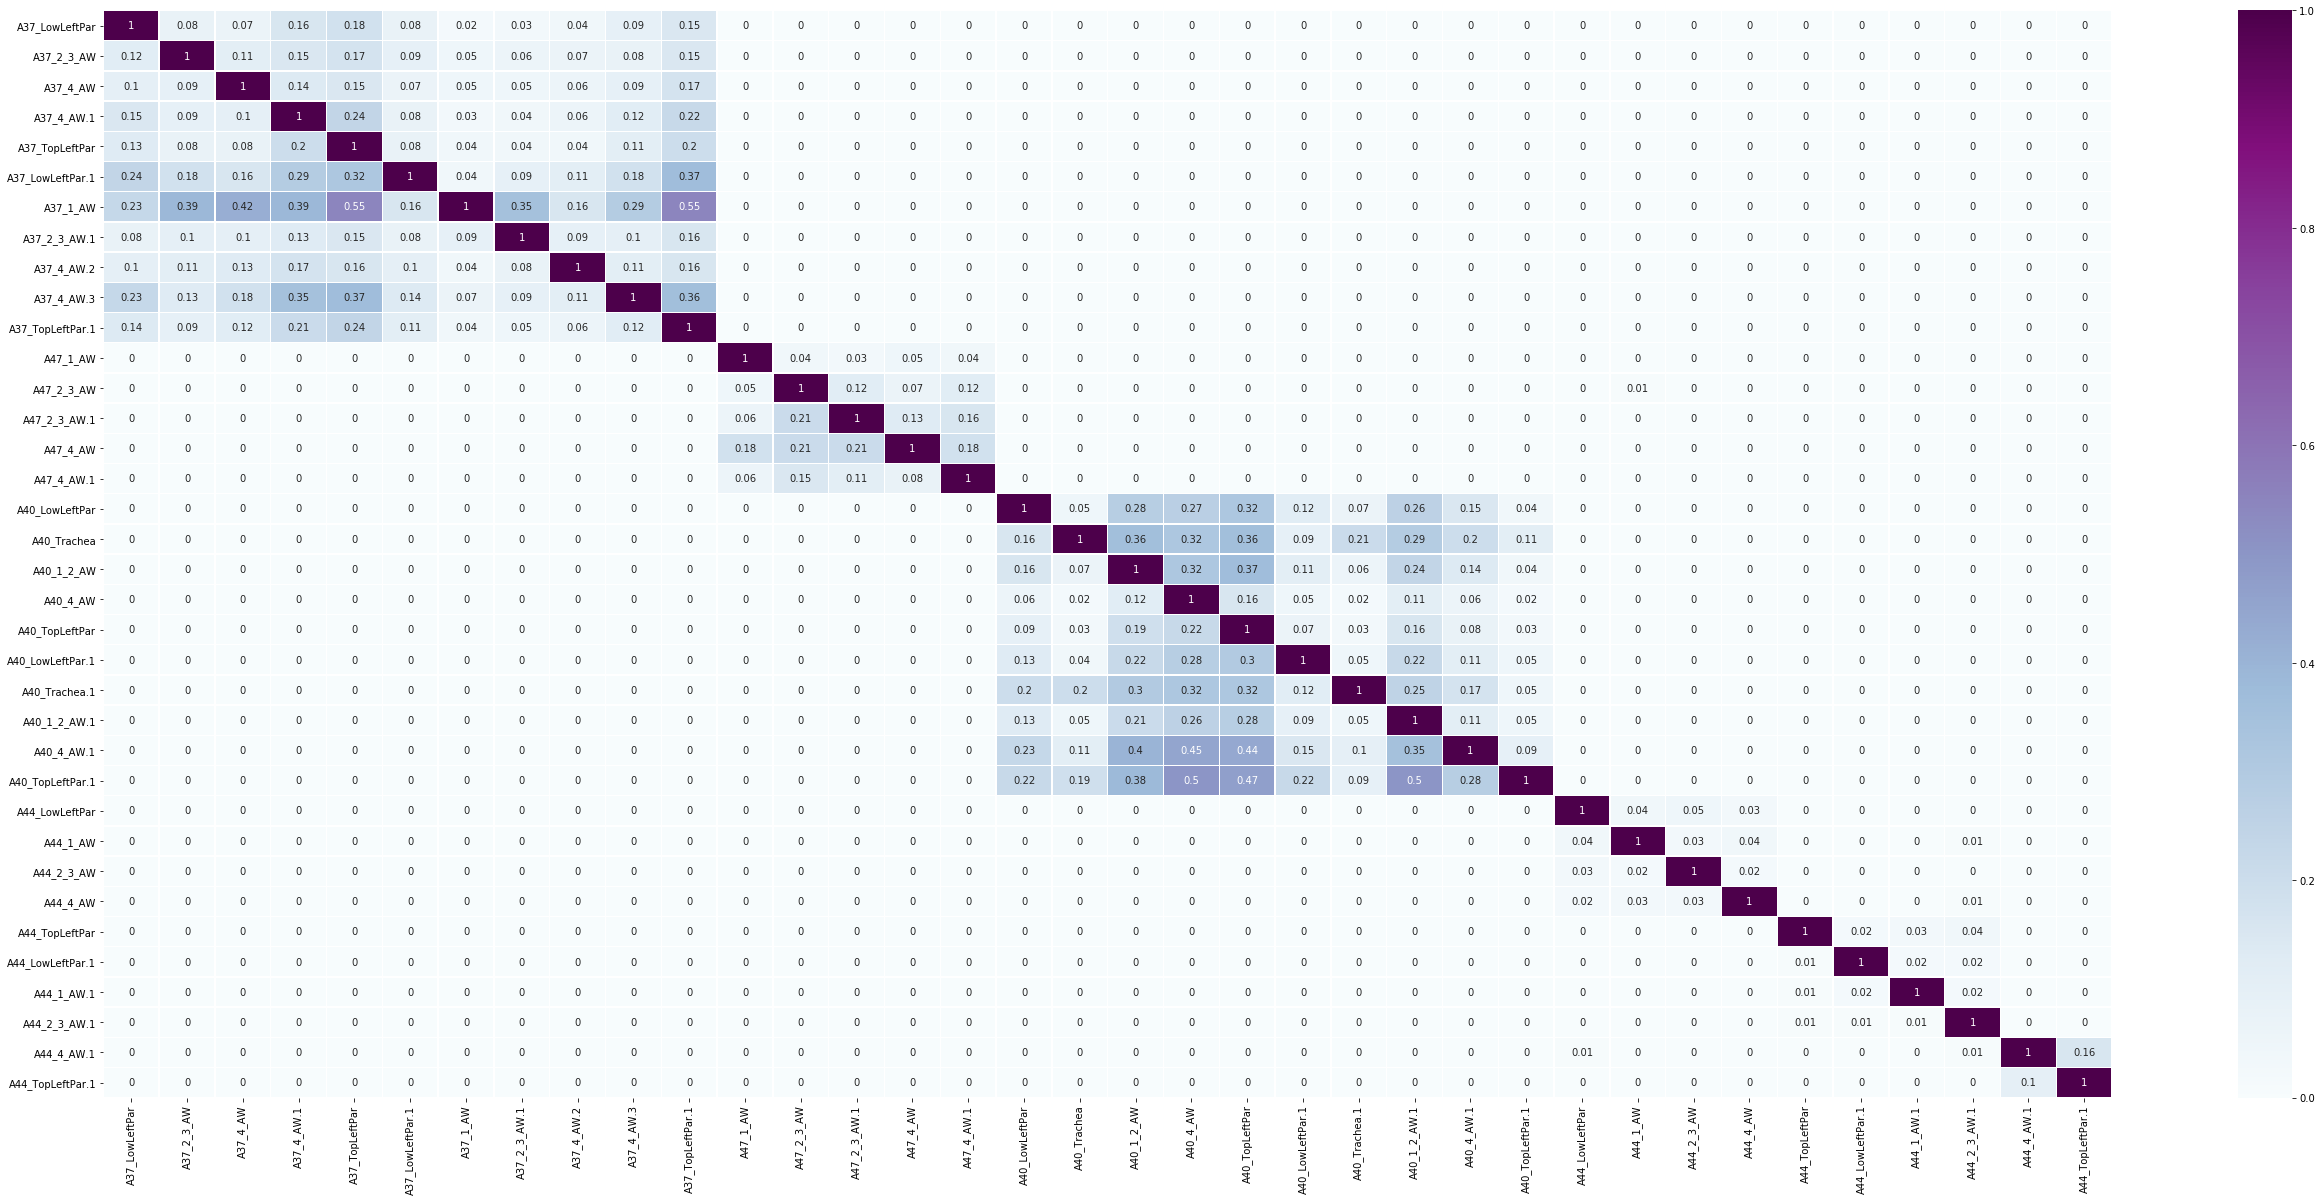

In [96]:
plt.figure(figsize = (45,20))

sns.heatmap(prop_shared_all, annot=True, linewidths=.5, cmap="BuPu")

## Clonotype calling across all individuals for all clones filtering out the ones with only one cell representing them (for n in all_clones)

In [49]:
cln_dict = defaultdict(list)

for n in all_clones:
    for s in samples:
        cond = clones[s]['cdr3s_nt'] == n
        clon_count = clones[s][cond]
        cln_dict[n].append(clon_count['CloneID'].count())

In [50]:
clone_detection = pd.DataFrame(cln_dict).T
clone_detection.columns = IDs

In [99]:
#clone_detection.to_csv('/home/jovyan/LungQC/adult_5loc_VDJ/clone_detection_all.csv')

In [100]:
infile = pd.read_csv('/home/jovyan/LungQC/adult_5loc_VDJ/clone_detection_all.csv', index_col=0)

output_all = pd.DataFrame(0, index=infile.columns, columns=infile.columns)


for c in infile.index:
    for s in infile.columns:
        for i in infile.columns:     
            if infile.loc[c,s] == 1 & infile.loc[c,i] == 1:
                output_all.loc[s,i] += 1

print(output_all)

                  A37_LowLeftPar  A37_2_3_AW  A37_4_AW  A37_4_AW.1  \
A37_LowLeftPar                69          24        21          46   
A37_2_3_AW                    24          44        22          31   
A37_4_AW                      21          22        41          31   
A37_4_AW.1                    46          31        31          96   
A37_TopLeftPar                48          35        31          73   
A37_LowLeftPar.1              24          20        17          30   
A37_1_AW                       7          12        12          11   
A37_2_3_AW.1                   8          12        11          14   
A37_4_AW.2                    12          13        11          20   
A37_4_AW.3                    25          16        20          38   
A37_TopLeftPar.1              45          32        36          65   
A47_1_AW                       0           0         0           0   
A47_2_3_AW                     0           0         0           0   
A47_2_3_AW.1        

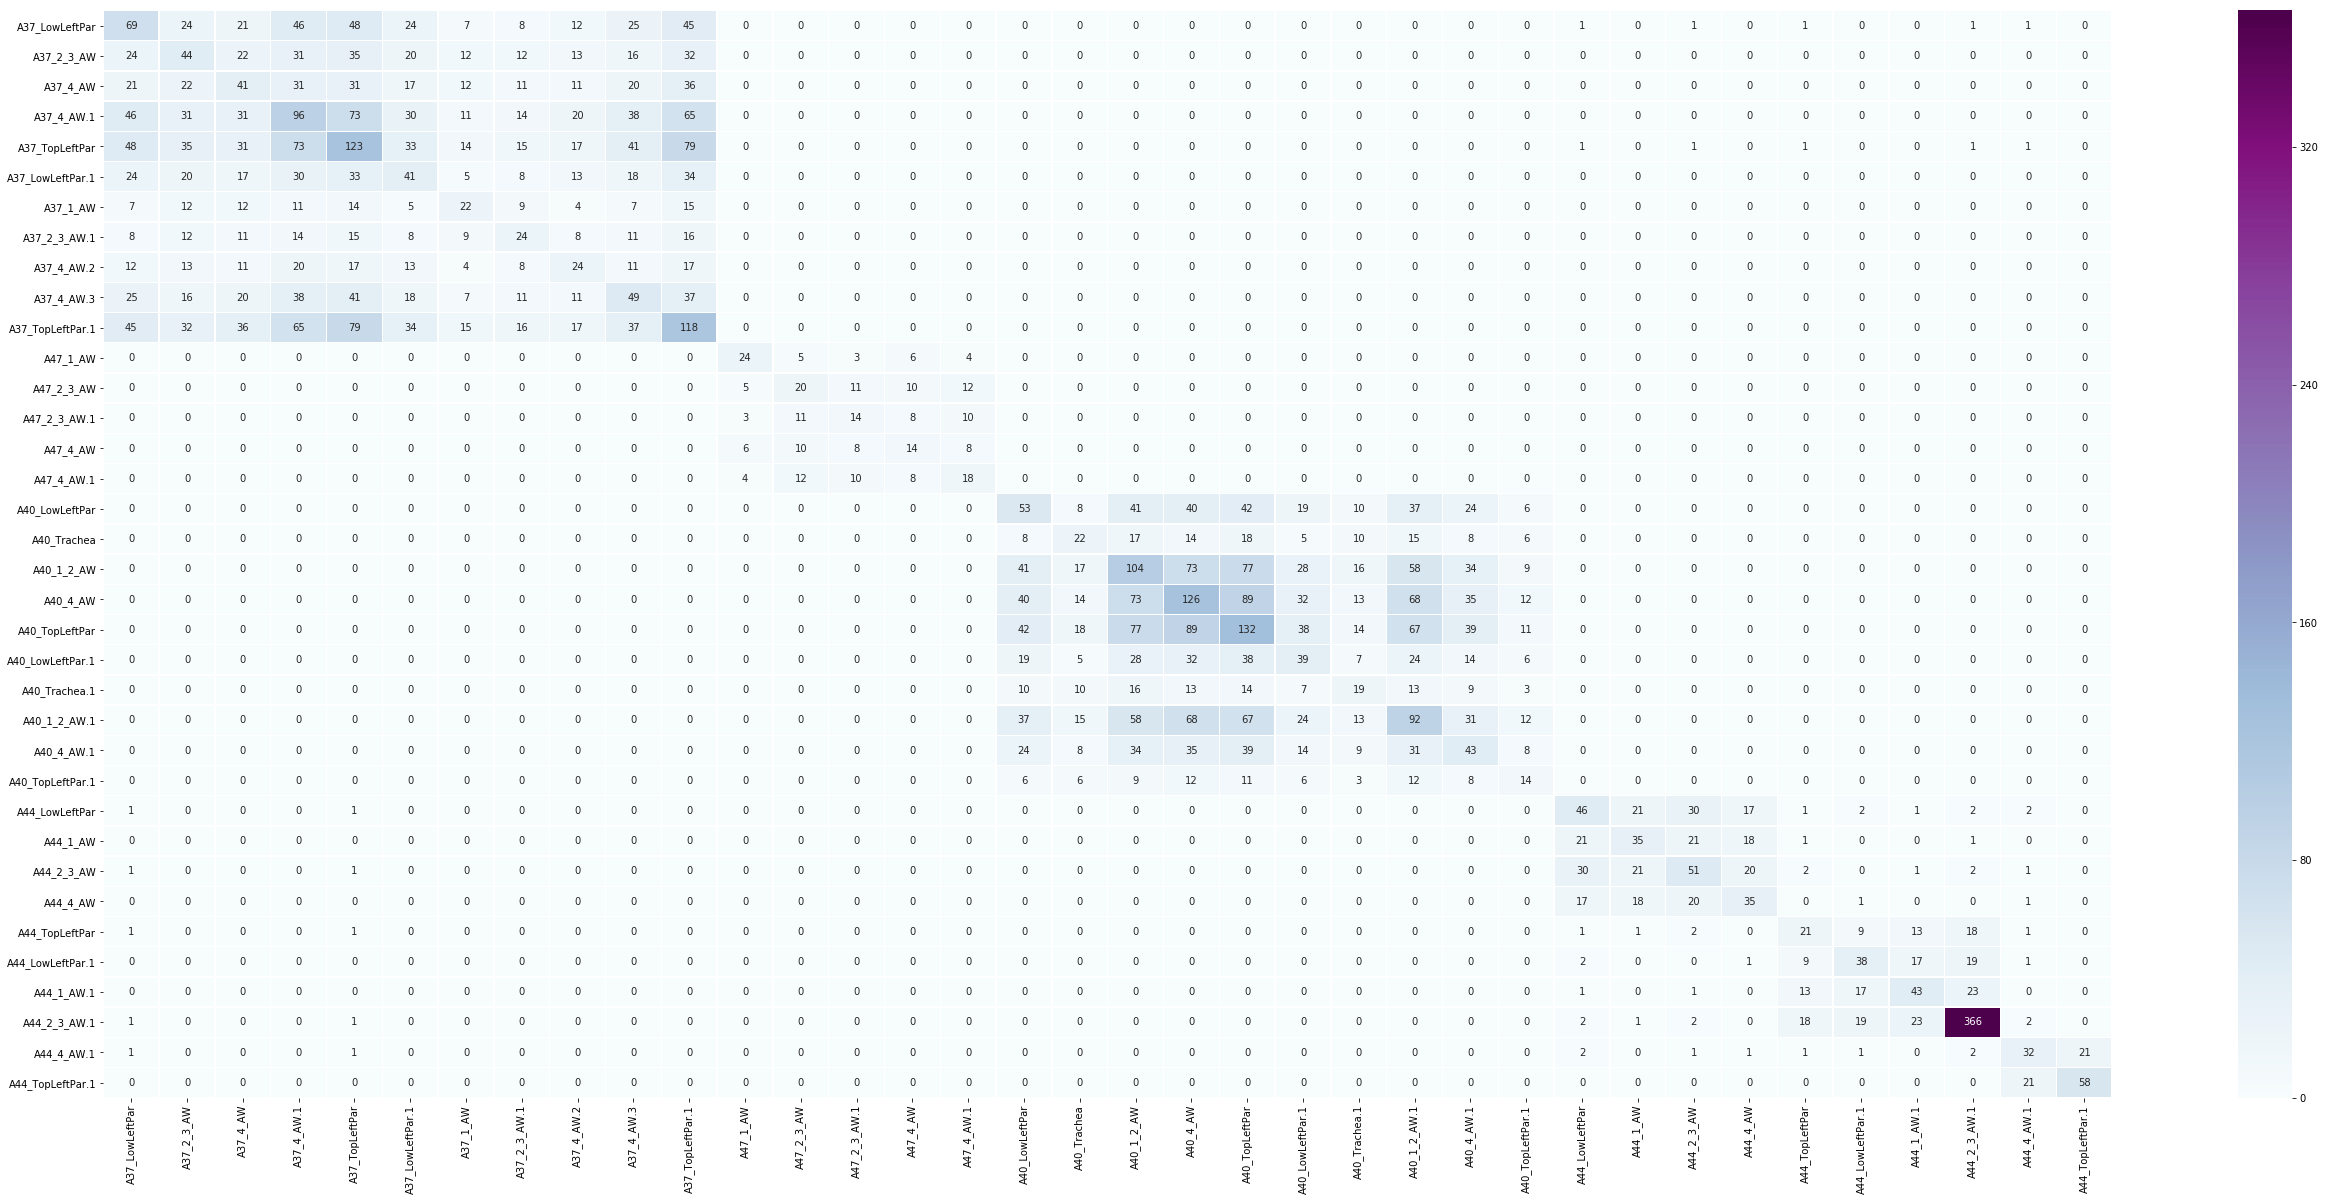

In [101]:
plt.figure(figsize = (45,20))

sns.heatmap(output_all, annot=True, fmt="d", linewidths=.5, cmap="BuPu")

In [102]:
#output_all.to_csv('/home/jovyan/LungQC/adult_5loc_VDJ/clonotype_sharing_all.csv')

In [103]:
infile = pd.read_csv('/home/jovyan/LungQC/adult_5loc_VDJ/clonotype_sharing_all.csv', index_col=0)

prop_shared_all = pd.DataFrame(0, index=infile.columns, columns=infile.columns)


for c in infile.index:
    for s in infile.columns:    
            if infile.loc[c,c] == 0:
                prop_shared_all.loc[c,s] = 0
            else:
                prop_shared_all.loc[c,s] = round(infile.loc[c,s]/infile.loc[c,c], 2)

print(prop_shared_all)

                  A37_LowLeftPar  A37_2_3_AW  A37_4_AW  A37_4_AW.1  \
A37_LowLeftPar              1.00        0.35      0.30        0.67   
A37_2_3_AW                  0.55        1.00      0.50        0.70   
A37_4_AW                    0.51        0.54      1.00        0.76   
A37_4_AW.1                  0.48        0.32      0.32        1.00   
A37_TopLeftPar              0.39        0.28      0.25        0.59   
A37_LowLeftPar.1            0.59        0.49      0.41        0.73   
A37_1_AW                    0.32        0.55      0.55        0.50   
A37_2_3_AW.1                0.33        0.50      0.46        0.58   
A37_4_AW.2                  0.50        0.54      0.46        0.83   
A37_4_AW.3                  0.51        0.33      0.41        0.78   
A37_TopLeftPar.1            0.38        0.27      0.31        0.55   
A47_1_AW                    0.00        0.00      0.00        0.00   
A47_2_3_AW                  0.00        0.00      0.00        0.00   
A47_2_3_AW.1        

In [104]:
prop_shared_all

,A37_LowLeftPar,A37_2_3_AW,A37_4_AW,A37_4_AW.1,A37_TopLeftPar,A37_LowLeftPar.1,A37_1_AW,A37_2_3_AW.1,A37_4_AW.2,A37_4_AW.3,...,A44_LowLeftPar,A44_1_AW,A44_2_3_AW,A44_4_AW,A44_TopLeftPar,A44_LowLeftPar.1,A44_1_AW.1,A44_2_3_AW.1,A44_4_AW.1,A44_TopLeftPar.1
A37_LowLeftPar,1.00,0.35,0.30,0.67,0.70,0.35,0.10,0.12,0.17,0.36,...,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00
A37_2_3_AW,0.55,1.00,0.50,0.70,0.80,0.45,0.27,0.27,0.30,0.36,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A37_4_AW,0.51,0.54,1.00,0.76,0.76,0.41,0.29,0.27,0.27,0.49,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A37_4_AW.1,0.48,0.32,0.32,1.00,0.76,0.31,0.11,0.15,0.21,0.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A37_TopLeftPar,0.39,0.28,0.25,0.59,1.00,0.27,0.11,0.12,0.14,0.33,...,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00
A37_LowLeftPar.1,0.59,0.49,0.41,0.73,0.80,1.00,0.12,0.20,0.32,0.44,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A37_1_AW,0.32,0.55,0.55,0.50,0.64,0.23,1.00,0.41,0.18,0.32,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A37_2_3_AW.1,0.33,0.50,0.46,0.58,0.62,0.33,0.38,1.00,0.33,0.46,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A37_4_AW.2,0.50,0.54,0.46,0.83,0.71,0.54,0.17,0.33,1.00,0.46,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A37_4_AW.3,0.51,0.33,0.41,0.78,0.84,0.37,0.14,0.22,0.22,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


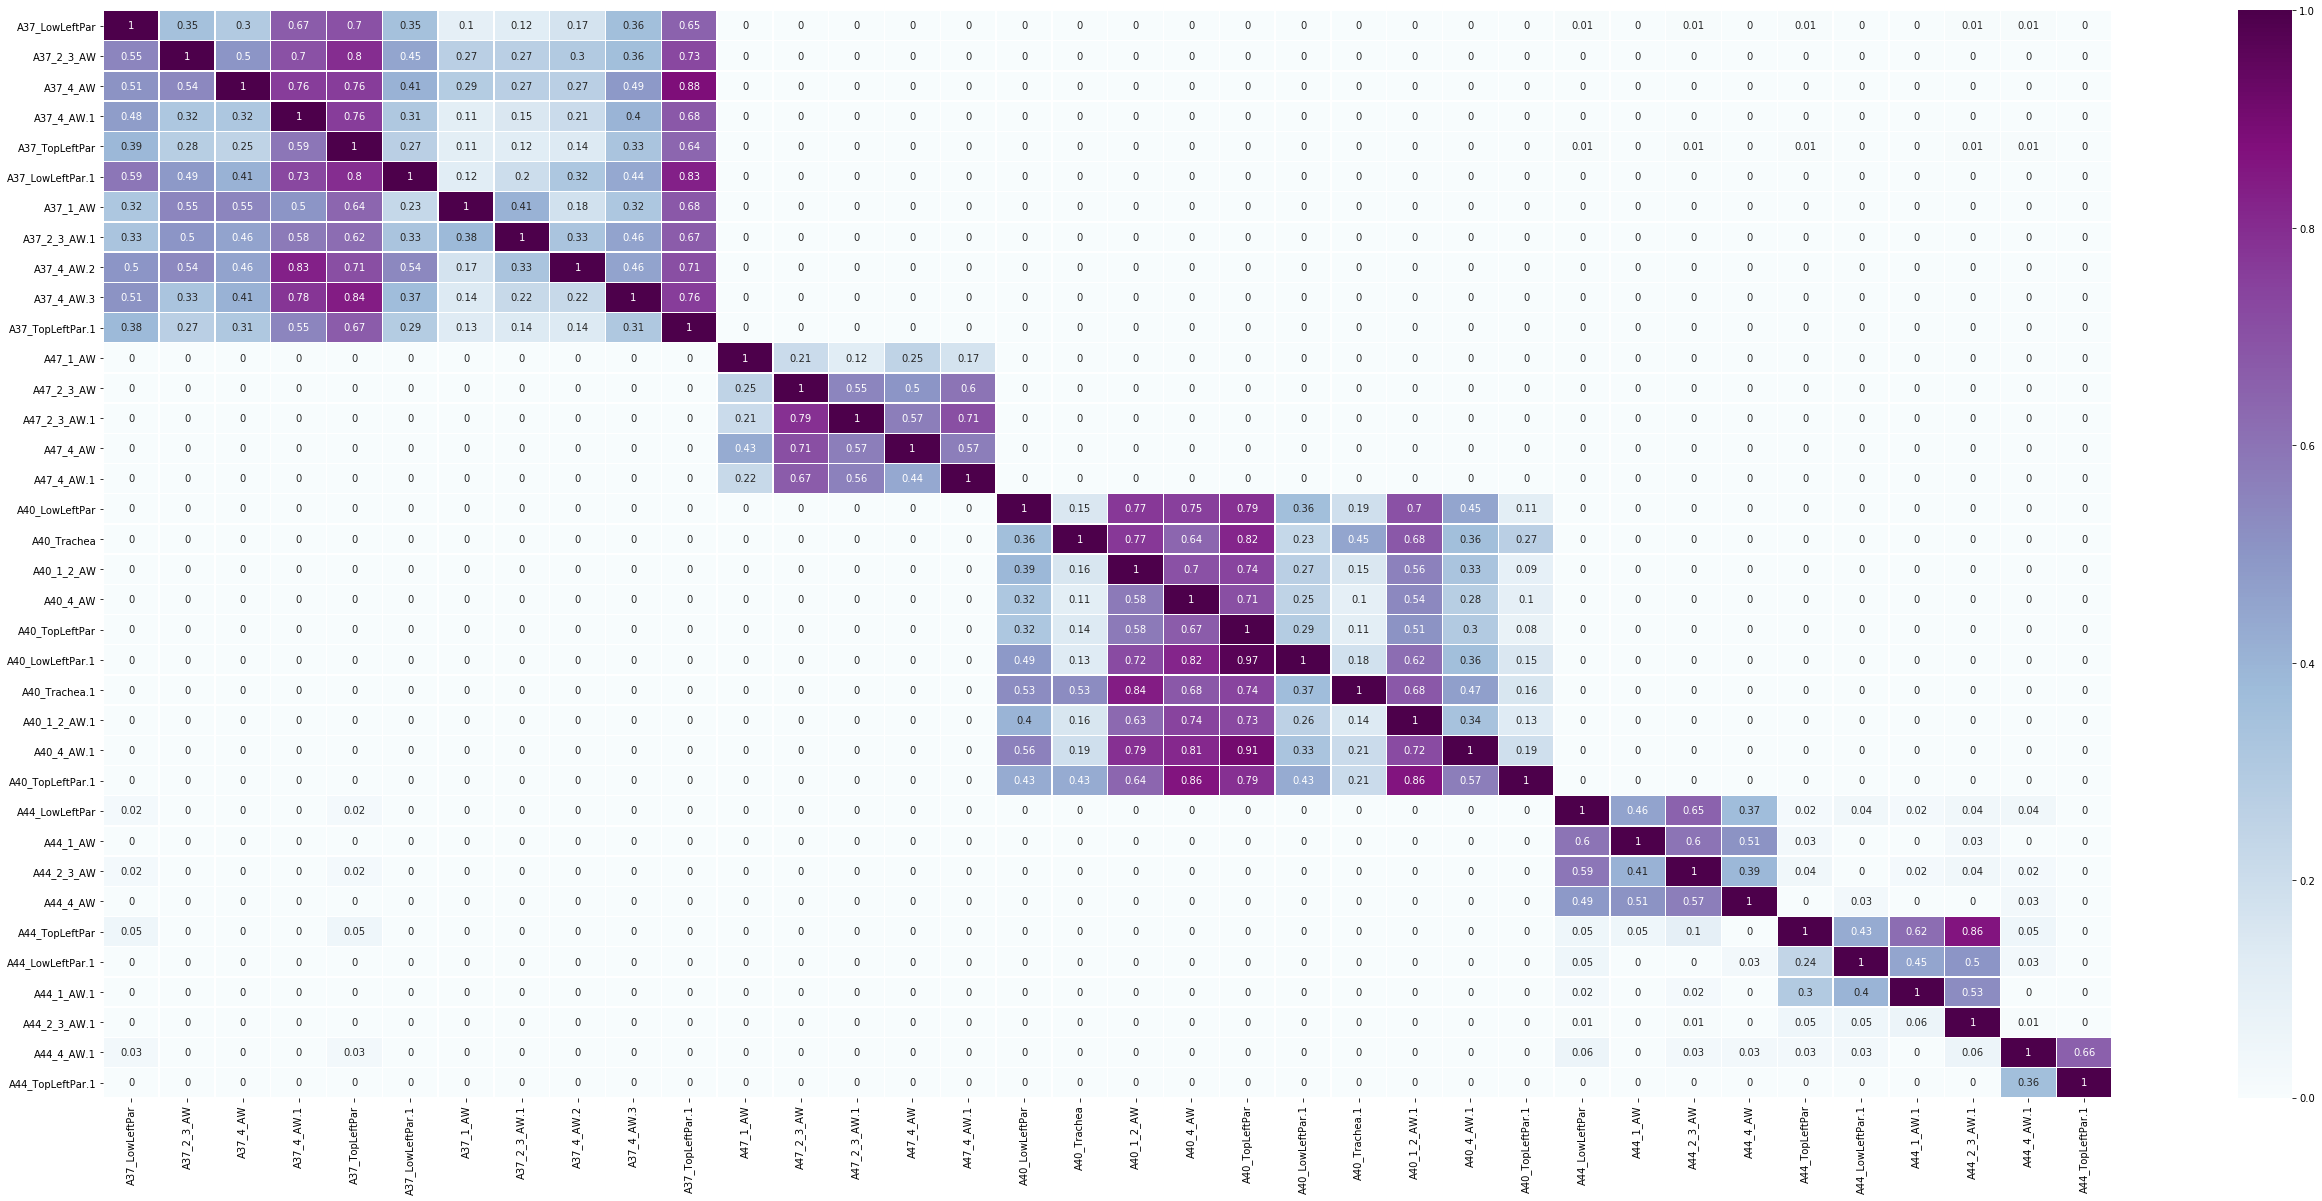

In [105]:
plt.figure(figsize = (45,20))

sns.heatmap(prop_shared_all, annot=True, linewidths=.5, cmap="BuPu")